<a href="https://colab.research.google.com/github/manish2509/Notes-Summarization/blob/main/Summarizing_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing sumy package
!pip install sumy

     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 10.1MB 8.4MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21680 sha256=1fef9d7031cc7eb36f1bc7255bf9d4d06aa45cffa2d40e60c49620b1cbc91cd5
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=ff4b60722501f7e98ba5c282d9b270fe300eb0a5fddf5c48a7e7ff57483e3e9c
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built breadability pycountry


In [ ]:
#Installing Opencv
!pip install opencv-python
#Installing Pytesseract
!pip install pytesseract
#Installing tesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=22cd8185a0c915ba333dfa2288888334ec6100fe07cd56e1d0adb2dfe6433f58
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
#Installing nltk package
!pip install nltk

In [ ]:
#Import the Reqquired Libraries
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import nltk,re,pprint
from nltk import word_tokenize
from urllib import request
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
#Download punkt for Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Choices:
1. Textual Input
2. Image Input
Enter the choice number : 2


Saving text.PNG to text (1).PNG
 Input Image : 


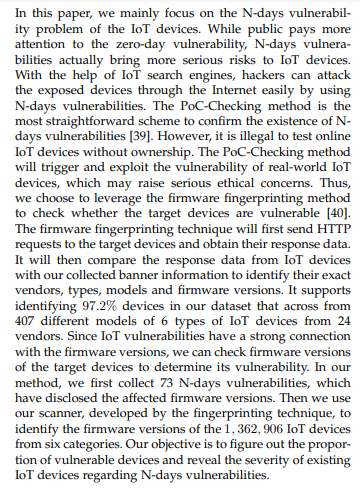

Gray Scale Image : 


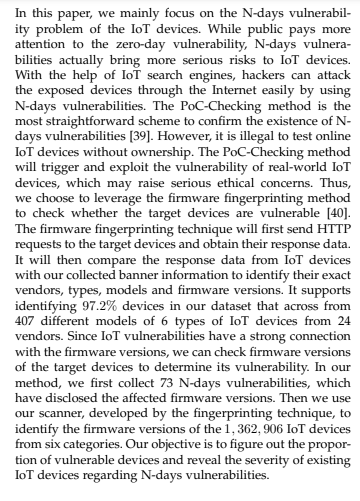

Threshold Image : 


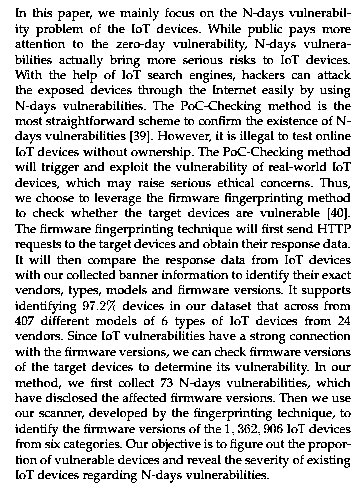

In [ ]:
print("Choices:")
print("1. Textual Input")
print("2. Image Input")
ch=int(input("Enter the choice number : "))
if(ch==1):

  #Getting Textual Input from the user
  userInput = input("Enter the Text :\n").splitlines()
  print(userInput)
  data=''.join(userInput)
  #Initialsing the parser
  parser = PlaintextParser.from_string(data,Tokenizer('english'))

elif(ch==2):
  
  #Getting Image input from user
  from google.colab import files
  #Getting the name of image file
  image = list(files.upload().keys())[0]
  image = cv2.imread(image)
  print(" Input Image : ")
  cv2_imshow(image)
  #Converting into Grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  print("Gray Scale Image : ")
  cv2_imshow(gray_image)
  #Threshold image
  threshold_img = cv2.threshold(gray_image,0,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
  print("Threshold Image : ")
  cv2_imshow(threshold_img)
  pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')
  #Text extraction from image using pytesseract
  data = pytesseract.image_to_string(image, lang='eng', config='-psm 1')
  #Initialising the parser
  parser = PlaintextParser.from_string(data,Tokenizer('english'))

else:

  print("Invalid Data!!")


In [ ]:
#Getting summary using Lex Ranl
lex_rank_summarizer = LexRankSummarizer()
summary = lex_rank_summarizer(parser.document,sentences_count=10)

In [ ]:
#Printing the Sentence in the summary
for sentence in summary:
  print(sentence)

In this paper, we mainly focus on the N-days vulnerabil- ity problem of the loT devices.
The PoC-Checking method is the ‘most straightforward scheme to confirm the existence of N- days vulnerabilities [39].
However, it is illegal to test online oT devices without ownership.
The PoC-Checking method will trigger and exploit the vulnerability of real-world IoT devices, which may raise serious ethical concems.
Thus, ‘we choose to leverage the firmware fingerprinting method to check whether the target devices are vulnerable [40] The firmware fingerprinting technique will first send HTTP requests to the target devices and obtain their response data.
It will then compare the response data from IoT devices with our collected banner information to identify their exact vendors, types, models and firmware versions.
It supports, identifying 97.2% devices in our dataset that across from 407 different models of 6 types of IoT devices from 24 vendors.
Since loT vulnerabilities have a strong connectio